<a href="https://colab.research.google.com/github/Spontyrupple/mamaine/blob/main/King_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:**

**"Where Do We Need to Focus? Mapping K-4 Reading Proficiency in King County"**

**Introduction**

On September 14 2023, the KUOW website carried a news story that quoted a study that revealed that 50% of Washington students were reading below their grade level. This study is therefore a spatial analysis that highlights gaps in K-4 reading proficiency in Washington's King County.

**Data Sources**

GIS data

https://gis-kingcounty.opendata.arcgis.com/datasets/bace62518e9e4b5fbd6dfc386380d417/explore


Academic Acheivement reports

https://www.kuow.org/stories/new-test-scores-show-50-of-wa-students-are-reading-at-grade-level

https://data.kingcounty.gov/County-Operations/EGP-Nonprofits/4wxy-htkj/about_data


In [ ]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

In [ ]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O kingcounty.zip https://docs.google.com/uc?id=1oZr6tGskrK9bh1Fcnr7YR4CGurSMcOAT&export=download

zip_ref = zipfile.ZipFile('kingcounty.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kingc=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

**King County Bounderies**

<Axes: >

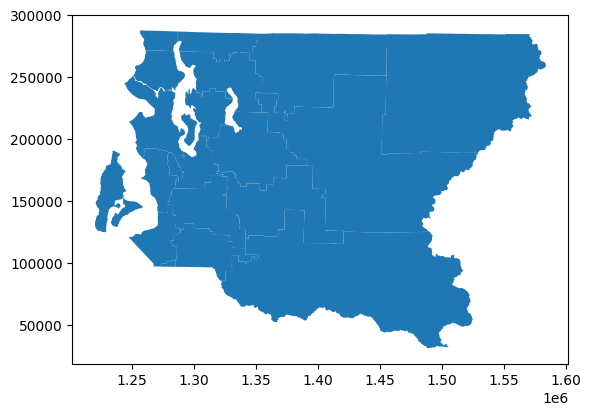

In [ ]:
#make the map
kingc.plot()

In [ ]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O kingcounty.zip https://docs.google.com/uc?id=1oZr6tGskrK9bh1Fcnr7YR4CGurSMcOAT&export=download

zip_ref = zipfile.ZipFile('kingcounty.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kingc=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

In [ ]:
kingc.dtypes #with geopandas can do stuff like with pandas :)
#kingc.info()

,0
OBJECTID,int32
SCHDST,object
NAME,object
DSTNUM,object
Shape_Leng,float64
Shape_Area,float64
geometry,geometry


In [ ]:
kingc.head(2)

,OBJECTID,SCHDST,NAME,DSTNUM,Shape_Leng,Shape_Area,geometry
0,1,1,Seattle,17001,435832.057306,2.570871e+09,"MULTIPOLYGON (((1253617.117 247017.982, 125371..."
1,2,210,Federal Way,17210,174516.492001,1.002921e+09,"POLYGON ((1279490.951 147040.874, 1279534.555 ..."


In [ ]:
kingc=kingc[['SCHDST','NAME','DSTNUM','geometry']]

<Axes: >

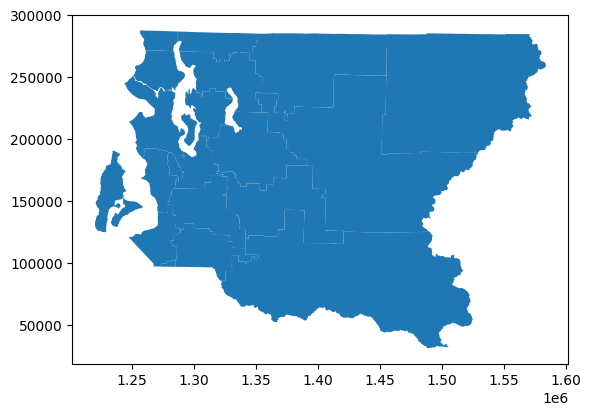

In [ ]:
kingc.plot()

In [ ]:
# Convert the 'DSTNUM' column to numeric type
kingc['DSTNUM'] = pd.to_numeric(kingc['DSTNUM'])

<Axes: >

[]

[]

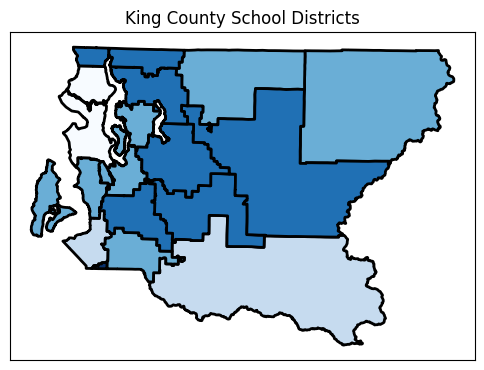

In [ ]:
#first thematic map! lets unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
kingc.plot(ax=ax,column='DSTNUM',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='Black',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
ax.legend().remove()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("King County School Districts")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [ ]:
!pip install pandas
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/Spontyrupple/mamaine/refs/heads/main/KCSO_Offense_Reports__2020_to_Present_20240926.csv')
df=df[0:5]
df

,case_number,incident_datetime,nibrs_code,nibrs_code_name,block_address,city,state,zip,reporting_area,district,precinct,created_at,updated_at,hour_of_day,day_of_week,ID
0,C20701901,05/13/2020 05:00:00 PM,26F,Identity Theft,4400 Block ISSAQUAH PINE LAKE RD SE,SAMMAMISH,WA,98075,Reporting Area O03013,District O3,2.0,05/13/2020 06:52:18 PM,05/14/2020 08:33:26 AM,17.0,4.0,"13,167,580,106"
1,C20701902,05/02/2020 09:00:00 AM,26F,Identity Theft,22900 Block SE 268TH PL,MAPLE VALLEY,WA,98038,Reporting Area H01006,District H1,3.0,05/13/2020 06:52:25 PM,05/14/2020 08:32:30 AM,9.0,7.0,"13,167,581,232"
2,C20701903,05/12/2020 11:15:00 AM,26F,Identity Theft,13500 Block 409TH AVE SE,NORTH BEND,WA,98045,Reporting Area C01006,District C1,2.0,05/13/2020 07:02:10 PM,05/14/2020 08:32:09 AM,11.0,3.0,"13,167,948,826"
3,C20701904,05/13/2020 03:30:00 PM,26F,Identity Theft,4200 Block REGENCY PL,CARNATION,WA,98014,Reporting Area R18001,District R18,2.0,05/13/2020 07:02:17 PM,05/14/2020 08:31:38 AM,15.0,4.0,"13,167,948,962"
4,C20701907,04/01/2020 12:00:00 AM,26F,Identity Theft,8200 Block S 124TH ST,SEATTLE,WA,98178,Reporting Area K08005,District K8,4.0,05/13/2020 07:12:08 PM,05/14/2020 08:31:16 AM,0.0,4.0,"13,168,327,613"


In [ ]:
from geopandas.tools import geocode


In [ ]:
geo = geocode(df['block_address'], provider='nominatim', user_agent='myName',timeout=2)
geo.head(2)

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,geometry,address
0,POINT EMPTY,None
1,POINT EMPTY,None
